# luz, camera ação

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### plotando dataFrame sem filtragem

In [33]:
dataFrame = pd.read_csv('horasUsandoCelular.csv', sep=',', engine='python')
dataFrame.head()

,"REF_DATE,""GEO"",""DGUID"",""Sex"",""Age group"",""Activity"",""Period of the week"",""Student response"",""UOM"",""UOM_ID"",""SCALAR_FACTOR"",""SCALAR_ID"",""VECTOR"",""COORDINATE"",""VALUE"",""STATUS"",""SYMBOL"",""TERMINATED"",""DECIMALS"""
0,"2002,""Belgium (French speaking)"","""",""Males"",""1..."
1,"2002,""Belgium (French speaking)"","""",""Males"",""1..."
2,"2002,""Belgium (French speaking)"","""",""Males"",""1..."
3,"2002,""Belgium (French speaking)"","""",""Males"",""1..."
4,"2002,""Belgium (French speaking)"","""",""Males"",""1..."


In [43]:
print(dataFrame.columns)
print('Tamanho do array:', len(dataFrame.columns))

Index(['REF_DATE,"GEO","DGUID","Sex","Age group","Activity","Period of the week","Student response","UOM","UOM_ID","SCALAR_FACTOR","SCALAR_ID","VECTOR","COORDINATE","VALUE","STATUS","SYMBOL","TERMINATED","DECIMALS"'], dtype='object')
Tamanho do array: 1


##### De fato não está nada bom!! Vamos tentar descobri o que há de errado aqui 🤔🤔
Vamos dar uma olhada no nosso arquivo CSV para tentarmos entender o que está acontecendo...
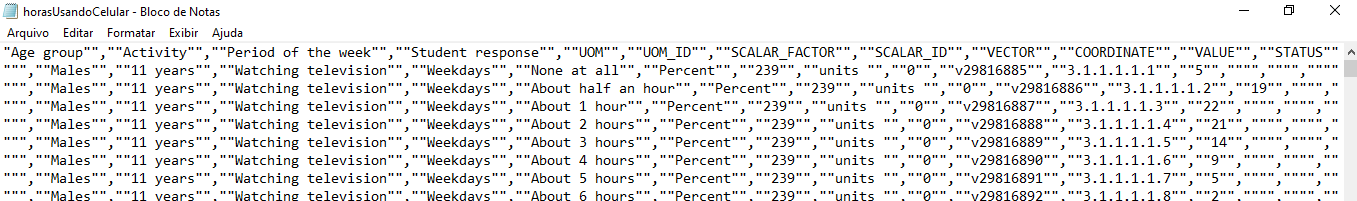
##### Parece que cada atributo esta entre aspas e separado por vírgulas também entre aspas

In [4]:
# tentando ler o data frame usando como separador uma vírgula entre aspas
dataFrame = pd.read_csv('horasUsandoCelular.csv', sep='","', engine='python')
dataFrame.head()

,"""REF_DATE,""""GEO""","""DGUID""","""Sex""","""Age group""","""Activity""","""Period of the week""","""Student response""","""UOM""","""UOM_ID""","""SCALAR_FACTOR""","""SCALAR_ID""","""VECTOR""","""COORDINATE""","""VALUE""","""STATUS""","""SYMBOL""","""TERMINATED""","""DECIMALS"""""""
0,"""2002,""""Belgium (French speaking)""","""""","""Males""","""11 years""","""Watching television""","""Weekdays""","""None at all""","""Percent""","""239""","""units ""","""0""","""v29816885""","""3.1.1.1.1.1""","""5""","""""","""""","""""","""0"""""""
1,"""2002,""""Belgium (French speaking)""","""""","""Males""","""11 years""","""Watching television""","""Weekdays""","""About half an hour""","""Percent""","""239""","""units ""","""0""","""v29816886""","""3.1.1.1.1.2""","""19""","""""","""""","""""","""0"""""""
2,"""2002,""""Belgium (French speaking)""","""""","""Males""","""11 years""","""Watching television""","""Weekdays""","""About 1 hour""","""Percent""","""239""","""units ""","""0""","""v29816887""","""3.1.1.1.1.3""","""22""","""""","""""","""""","""0"""""""
3,"""2002,""""Belgium (French speaking)""","""""","""Males""","""11 years""","""Watching television""","""Weekdays""","""About 2 hours""","""Percent""","""239""","""units ""","""0""","""v29816888""","""3.1.1.1.1.4""","""21""","""""","""""","""""","""0"""""""
4,"""2002,""""Belgium (French speaking)""","""""","""Males""","""11 years""","""Watching television""","""Weekdays""","""About 3 hours""","""Percent""","""239""","""units ""","""0""","""v29816889""","""3.1.1.1.1.5""","""14""","""""","""""","""""","""0"""""""


###### Ehh voalá!!! As coisas melhoraram um pouco, mas ainda não estão o melhor possível!
Percebemos que a primeira coluna está colada com a segunda, e que os números sairam com aspas também, o que não é nada bom...

In [5]:
dataFrame = pd.read_csv('horasUsandoCelular.csv', sep='"",""', engine='python')
dataFrame.head()

,"""REF_DATE,""""GEO",DGUID,Sex,Age group,Activity,Period of the week,Student response,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,"DECIMALS"""""""
0,"""2002,""""Belgium (French speaking)",NaN,Males,11 years,Watching television,Weekdays,None at all,Percent,239,units,0,v29816885,3.1.1.1.1.1,5,NaN,NaN,NaN,"0"""""""
1,"""2002,""""Belgium (French speaking)",NaN,Males,11 years,Watching television,Weekdays,About half an hour,Percent,239,units,0,v29816886,3.1.1.1.1.2,19,NaN,NaN,NaN,"0"""""""
2,"""2002,""""Belgium (French speaking)",NaN,Males,11 years,Watching television,Weekdays,About 1 hour,Percent,239,units,0,v29816887,3.1.1.1.1.3,22,NaN,NaN,NaN,"0"""""""
3,"""2002,""""Belgium (French speaking)",NaN,Males,11 years,Watching television,Weekdays,About 2 hours,Percent,239,units,0,v29816888,3.1.1.1.1.4,21,NaN,NaN,NaN,"0"""""""
4,"""2002,""""Belgium (French speaking)",NaN,Males,11 years,Watching television,Weekdays,About 3 hours,Percent,239,units,0,v29816889,3.1.1.1.1.5,14,NaN,NaN,NaN,"0"""""""


As coisas melhoraram um pouco, mas ainda sim temos as duas primeiras tabelas unidas, além de um monte de aspas na última coluna. 
Talvez alguma pessoa já esteja pensando: "Ah então joga todas essas aspas fora de uma vez" Pois bem, é possível fazer isso. Vamos lá!

In [8]:
#Analisando os tipos dos nossos atributos
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1836 entries, 0 to 1835
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   "REF_DATE,""GEO     1836 non-null   object 
 1   DGUID               0 non-null      float64
 2   Sex                 1836 non-null   object 
 3   Age group           1836 non-null   object 
 4   Activity            1836 non-null   object 
 5   Period of the week  1836 non-null   object 
 6   Student response    1836 non-null   object 
 7   UOM                 1836 non-null   object 
 8   UOM_ID              1836 non-null   int64  
 9   SCALAR_FACTOR       1836 non-null   object 
 10  SCALAR_ID           1836 non-null   int64  
 11  VECTOR              1836 non-null   object 
 12  COORDINATE          1836 non-null   object 
 13  VALUE               1836 non-null   int64  
 14  STATUS              0 non-null      float64
 15  SYMBOL              0 non-null      float64
 16  TERMIN

In [16]:
# Modificando o atributo 'Age group'
# Retirando a unidade de medida

removeYears = lambda x: x.replace(' years', '').replace('"','')
idade_list = list(map(removeYears,  dataFrame['Age group']))

idade_list[: 10]

['11', '11', '11', '11', '11', '11', '11', '11', '11', '11']

In [21]:
# Criando um novo dataFrame com o atributo modificado
novoDataFrame = dataFrame
novoDataFrame['Age group'] = idade_list
novoDataFrame.head()

,"""REF_DATE,""""GEO",DGUID,Sex,Age group,Activity,Period of the week,Student response,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,"DECIMALS"""""""
0,"""2002,""""Belgium (French speaking)",NaN,Males,11,Watching television,Weekdays,None at all,Percent,239,units,0,v29816885,3.1.1.1.1.1,5,NaN,NaN,NaN,"0"""""""
1,"""2002,""""Belgium (French speaking)",NaN,Males,11,Watching television,Weekdays,About half an hour,Percent,239,units,0,v29816886,3.1.1.1.1.2,19,NaN,NaN,NaN,"0"""""""
2,"""2002,""""Belgium (French speaking)",NaN,Males,11,Watching television,Weekdays,About 1 hour,Percent,239,units,0,v29816887,3.1.1.1.1.3,22,NaN,NaN,NaN,"0"""""""
3,"""2002,""""Belgium (French speaking)",NaN,Males,11,Watching television,Weekdays,About 2 hours,Percent,239,units,0,v29816888,3.1.1.1.1.4,21,NaN,NaN,NaN,"0"""""""
4,"""2002,""""Belgium (French speaking)",NaN,Males,11,Watching television,Weekdays,About 3 hours,Percent,239,units,0,v29816889,3.1.1.1.1.5,14,NaN,NaN,NaN,"0"""""""


In [22]:
novoDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1836 entries, 0 to 1835
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   "REF_DATE,""GEO     1836 non-null   object 
 1   DGUID               0 non-null      float64
 2   Sex                 1836 non-null   object 
 3   Age group           1836 non-null   object 
 4   Activity            1836 non-null   object 
 5   Period of the week  1836 non-null   object 
 6   Student response    1836 non-null   object 
 7   UOM                 1836 non-null   object 
 8   UOM_ID              1836 non-null   int64  
 9   SCALAR_FACTOR       1836 non-null   object 
 10  SCALAR_ID           1836 non-null   int64  
 11  VECTOR              1836 non-null   object 
 12  COORDINATE          1836 non-null   object 
 13  VALUE               1836 non-null   int64  
 14  STATUS              0 non-null      float64
 15  SYMBOL              0 non-null      float64
 16  TERMIN

In [26]:
#Agora percebemos que o nosso atributo 'Age group' ainda esta como object, logo não podemos fazer contas caso queiramos.
#Como poderíamos conerte-las para valores numéricos?
#Podemos executar pd.to_numeric
novoDataFrame['Age group'] = pd.to_numeric(dataFrame['Age group'])
novoDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1836 entries, 0 to 1835
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   "REF_DATE,""GEO     1836 non-null   object 
 1   DGUID               0 non-null      float64
 2   Sex                 1836 non-null   object 
 3   Age group           1836 non-null   int64  
 4   Activity            1836 non-null   object 
 5   Period of the week  1836 non-null   object 
 6   Student response    1836 non-null   object 
 7   UOM                 1836 non-null   object 
 8   UOM_ID              1836 non-null   int64  
 9   SCALAR_FACTOR       1836 non-null   object 
 10  SCALAR_ID           1836 non-null   int64  
 11  VECTOR              1836 non-null   object 
 12  COORDINATE          1836 non-null   object 
 13  VALUE               1836 non-null   int64  
 14  STATUS              0 non-null      float64
 15  SYMBOL              0 non-null      float64
 16  TERMIN